

# Project: Investigate a Dataset (Medical Appointment No Shows)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>
**This is a dataset of people who made medical appointments in brazil, Some of them showed up for the appointment, and some didn't. the dataset is associated with some characteristics of the patients taken from the registeration form, and I will focus on understanding what affects patients showing up.**
>
> **After looking at this dataset I asked some questions that I'll try to find answers for some of them**:
>
> - what is the main factor the most affects patient appearence?
>
> - does recieving reminder message affects patience appearence?
>
> - does age or gender has a relation with showing up?
>
> - is alchoholism , diabetes, etc important to our main focus which is patients showing up?
>
> - if the appointment day was the schedule day ,does that affect coming to the appointment?
>
> - do people with a sholarship have more discipline?


In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section we'll load in the data, initially explore it, and check for cleanliness, and prepare it for analysis.


In [2]:
#load data
df=pd.read_csv('noshowappointments_may_2016.csv')
#preview data
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [3]:
#explore & Discover dataset
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [4]:
#check for missing values or duplicates..
df.isnull().any().sum()

0

In [5]:
#check for duplicates..
df.duplicated().any()

False

> **Result:**
>No missing values or duplicates in this dataset.. Cool!
>
>Next we check column names quality, and then check data types if any needs fixing.



### Data Cleaning 
> **ex:** the last two column names need optimization! and date columns need to be datatype fixed

In [6]:
# changing the last two column names..
df.rename(columns={'No-show':'No_Show','SMS_received':'SMS_Recieved'},inplace=True)
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_Recieved,No_Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [7]:
#Revising  columns datatypes
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_Recieved        int64
No_Show            object
dtype: object

In [8]:
# appointment-day & scheduled-day need to be converted to datetime.

df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])

In [17]:
df.dtypes

PatientId                       int32
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_Recieved                    int64
No_Show                        object
dtype: object

In [9]:
# one last step of cleaning our data is droping (patient-id & appointment-id) of table, since i'll not use them
# in my analysis..
df.drop(['PatientId', 'AppointmentID'], axis = 1, inplace =True)
df.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_Recieved,No_Show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

> **We now re-ask, and try to answer the above questions:**


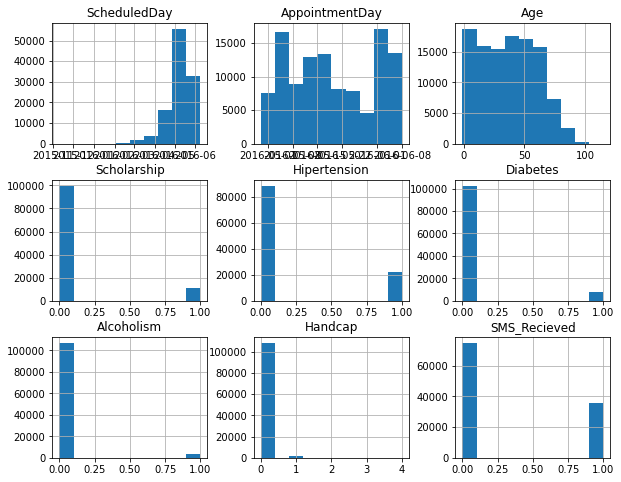

In [10]:
#exploring histograms of our dataset numerical values..
df.hist(figsize=(10,8));

### General observations:
>we can see from the histogram that most of patients don't have  medical scholarship.
>
> Also patients with diabetes, alcoholism, or handicap barely exist, will not affect our main question.
>
> recieving sms may affects the no-show attribute so we need to dig in it and discover..

In [11]:
#exploring some age info..
# patients age mean and median
df['Age'].median()
# result :37
df['Age'].mean()

37.08887421173107

In [12]:
df['Age'].quantile([.25,.75])
# patients  major age interval is between 18 and 55 years old

0.25    18.0
0.75    55.0
Name: Age, dtype: float64

### Question 1:
> **what is the percentage of  abscence of all patients? and what is the major case?**

In [13]:
# Number of Yes, No show-up patients
df['No_Show'].value_counts()

No     88208
Yes    22319
Name: No_Show, dtype: int64

In [19]:
# Perecentage of No-show up patients of all patients:
no_show_percentage =df['No_Show'].value_counts()[1]/df.shape[0]
no_show_percentage

0.20193255946510807

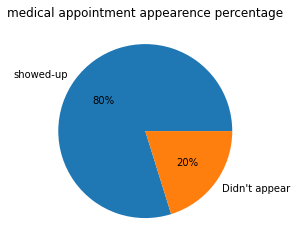

In [51]:
#Visulaising the result
df['No_Show'].value_counts().plot(kind='pie',autopct='%1.0f%%',labels=['showed-up','Didn\'t appear']);
plt.ylabel("")
plt.title('medical appointment appearence percentage');

#### answer 1:
> **20% of patients who reserve medical appointments don't appear at the appointment.**


### Question 2:
> **Is recieving a message before appointment increase the chance of patients to come?**

In [17]:
# create a dataframe of patients who recieved message of the appointment time.
df_sms=df.query('SMS_Recieved == 1')
# Check how many of them showed up..
df_sms['No_Show'].value_counts()

No     25698
Yes     9784
Name: No_Show, dtype: int64

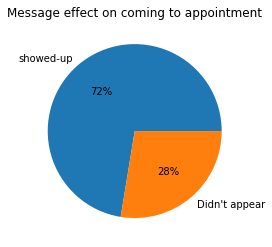

In [53]:
# Visualise the result
df_sms['No_Show'].value_counts().plot(kind='pie',autopct='%1.0f%%',labels=['showed-up','Didn\'t appear']);
plt.ylabel("")
plt.title('Message effect on coming to appointment');

#### answer 2:
> **Yes, 72% of patients who recieve a message come to thier appointments**

In [23]:
# More Exploratory
# create dataframe of all patients who acctually came to thier appointments
df_show=df.query('No_Show == "No"')
df_show.head(3)
# create dataframe of all patients who skipped thier appointments
df_no_show=df.query('No_Show == "Yes"')

In [24]:
# it seems there's ngative values in age cloumn.. I will go with dropping these values in the next cell.
df_show['Age'].mean()
df_show['Age'].min()

-1

In [25]:
df = df[df['Age']>=0]
df.shape[0]
df_show=df_show[df_show['Age']>=0]
df_show.shape[0]

88207

### Question 3:
> **Do patients with scholarship tend more to show up at thier appointments?**

In [26]:
# create dataframe of all patients with scholarship
df_scho=df[df['Scholarship'] == 1]

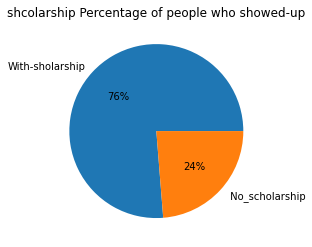

In [55]:
df_scho['No_Show'].value_counts().plot(kind='pie',autopct='%1.0f%%',labels=['With-sholarship',' No_scholarship'])
plt.ylabel("")
plt.title('shcolarship Percentage of people who showed-up');

#### Answer 3:
> **I guess having scholarship is a factor of patient presence.**
>
> 76% of patients with scholarship came to thier appointments.

### Question 4:
> **Check if Gender is a factor of appearing**

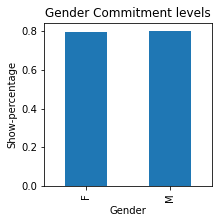

In [48]:
#Percentage of males and females showed up:
(df_show['Gender'].value_counts()/df['Gender'].value_counts()).plot(kind='bar', figsize=(3,3));
plt.xlabel('Gender');
plt.ylabel('Show-percentage');
plt.title('Gender Commitment levels');

#### Answer 4:
> **Equal percentage of males and females showed up, and it makes sense.**

### Question 5:
> **Is schedueling an urgent appointment increase the chance of patient coming?**

In [42]:
#Creating dataframe of patients who reserved thier appointments the same day they called to schedule..
df_same_day= df[df['AppointmentDay'].dt.date == df['ScheduledDay'].dt.date]
df_same_day.head(3)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_Recieved,No_Show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [43]:
df_same_day['No_Show'].value_counts()

No     36770
Yes     1792
Name: No_Show, dtype: int64

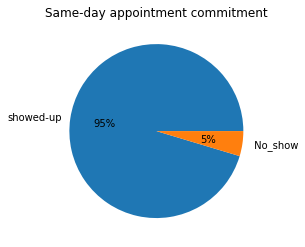

In [45]:
# Visualising the result
df_same_day['No_Show'].value_counts().plot(kind='pie',autopct='%1.0f%%',labels=['showed-up',' No_show']);
plt.ylabel("")
plt.title('Same-day appointment commitment');

#### Answer 5:
> **Great! around 95% of patients who had to visit the doctor at the same day came to thier appointments**
>
> This shows that quick visit reservation is a main factor of going to medical appointments.

#### Function takes user interaction:
> this function takes user input of a specific diagnosis and returns a chart represents No.of
    patients diagnosed show/No-Show and another chart of patients who aren\'t diagnosed show/No-Show.

['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']
Please select a diagnosis you want to see chart analysis for:
alcoholism
Here we go..



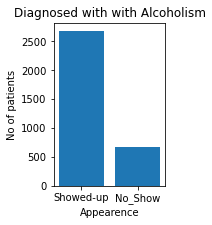

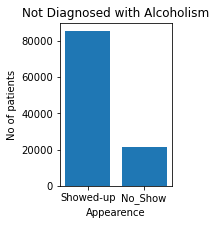

In [49]:
def user_input_diagnosis():
    '''
    this function takes user input of a specific diagnosis and returns a chart represents No.of
    patients diagnosed show/No-Show and another chart of patients who aren\'t diagnosed show/No-Show.
    '''
    list_of_diagnosis=['Hipertension','Diabetes','Alcoholism','Handcap']
    print(list_of_diagnosis)
    user_select=input('Please select a diagnosis you want to see chart analysis for:\n').title()
    while user_select not in list_of_diagnosis:
            user_select=input('Please select a diagnosis from the previous list:').title()
    print('Here we go..\n')
    patient_yes = df.groupby('{}'.format(user_select))['No_Show'].value_counts()[1]
    plt.subplots(figsize=(2, 3));
    plt.bar(['Showed-up','No_Show'],patient_yes,tick_label=['Showed-up','No_Show']);
    plt.xlabel('Appearence');
    plt.ylabel('No of patients');
    plt.title('Diagnosed with with {}'.format(user_select));
    patient_no = df.groupby('{}'.format(user_select))['No_Show'].value_counts()[0]
    plt.subplots(figsize=(2, 3));
    plt.bar(['Showed-up','No_Show'],patient_no,tick_label=['Showed-up','No_Show']);
    plt.xlabel('Appearence');
    plt.ylabel('No of patients');
    plt.title('Not Diagnosed with {}'.format(user_select));
user_input_diagnosis()

<a id='conclusions'></a>
## Conclusions

>**Here's the end of report.. I know I may haven't cover all the questions that should be asked, and I didn't do a lot of statistics, but I believe I answered few important questions.. So let's summerize them..**
>
> In general, 20% of patients who reserve medical appointments don't appear at the appointment.
>
> - the main **two factors** that most affect patient appearence are **(how urgent the appointment is & recieving a reminder message of the apointment)**.
>
> - being included in **Brasilian welfare scholarship** is a factor of discipline to appointments, although most of patirnts in the dataset aren't included in the scholarship, but the calculations on the scholarship group shows the effect..
>
> - Gender, Age aren't an obvoius factor of showing up in medical appointments.
>
>**Thank you.. and I hope the report was easy to understand.**